<a href="https://colab.research.google.com/github/Sarihdd/Fake-news-classification/blob/main/Fake_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/cleaned (1).csv")

In [ ]:
df.head(5)

,text,target
0,politicsnews u budget fight loom republican fl...,1.0
1,politicsnews u military accept transgender rec...,1.0
2,politicsnews senior u republican senator let m...,1.0
3,politicsnews fbi russia probe helped australia...,1.0
4,politicsnews trump want postal service charge ...,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    1750 non-null   object 
 1   target  1749 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.5+ KB


In [ ]:
df.shape

(1750, 2)

In [ ]:
df.duplicated().sum() #Checking for duplicate values in datasets

9

In [ ]:
df.drop_duplicates(inplace=True) #Removing duplicated values from datasets
df.duplicated().sum()

0

In [ ]:
df.isnull().sum() #Checking null values in datasets

text      0
target    1
dtype: int64

In [ ]:
#Removing null values
df.dropna(inplace=True)
df.isnull().sum()

text      0
target    0
dtype: int64

In [ ]:
#As the target columns is in float so lets change it into int
df.target = df.target.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740 entries, 0 to 1748
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1740 non-null   object
 1   target  1740 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 40.8+ KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(
    df['text'], df['target'], random_state=0, stratify = df['target'])


In [ ]:
x_train

879     politicsnews manafort associate gate hire new ...
655     politicsnews session looking special counsel c...
497     politicsnews u sen warren predicts appeal lega...
1276    politicsnews senior u legal official meeting u...
171     politicsnews trump dossier firm republican lea...
                              ...                        
1019    politicsnews justice department settle conserv...
584     politicsnews trump open dropping healthcare pr...
816     politicsnews ex democratic leader mulled dropp...
1056    politicsnews senate diverges renewal internet ...
1300    politicsnews white house committed helping pue...
Name: text, Length: 1305, dtype: object

In [ ]:
y_test

526     1
818     1
1042    1
1441    1
1248    1
       ..
176     1
234     1
1362    1
574     1
1014    1
Name: target, Length: 435, dtype: int64

In [ ]:
#Lets reshape it into numpy array
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [ ]:
y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
x_train[2]

'politicsnews senior u republican senator let mr mueller job washington reuters special counsel investigation link russia president trump election campaign continue without interference despite call trump administration ally republican lawmaker shut prominent republican senator said sunday lindsey graham serf senate armed force judiciary committee said department justice special counsel robert mueller need carry russia investigation without political interference investigation go forward investigation conducted without political influence graham said cbs face nation news program need let mr mueller job think right guy right time question russia may interfered election trump campaign may link co ordinated effort loomed white house since trump took office january show sign receding trump prepares second year power despite intensified rhetoric trump ally recent week accusing mueller team bias republican president trump seemed undercut supporter interview last week new york time said expec

In [ ]:
#Lets change word to number
import tensorflow as tf
vocab_size = 10000
max_len = 300
vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=vocab_size, # Maximum vocab size
 output_sequence_length=max_len, # # Sequence length to pad the outputs to.
 )

vectorize_layer.adapt(x_train.values)

vectorized_train_sentences = vectorize_layer(x_train.values)
vectorized_validation_sentences = vectorize_layer(x_test.values)

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(10000, 16, input_length=300))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))     #Stop when we get the best results
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 16)           160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              93600     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 253,801
Trainable params: 253,801
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
num_epochs = 10
history = model1.fit(vectorized_train_sentences, y_train,
                         validation_split = 0.3,
                    epochs=10,
                    batch_size = 64
                    )

Epoch 1/10
15/15 [==============================] - 16s 797ms/step - loss: 0.4607 - accuracy: 0.9441 - val_loss: 6.1179e-04 - val_accuracy: 1.0000
Epoch 2/10
15/15 [==============================] - 11s 724ms/step - loss: 1.2296e-04 - accuracy: 1.0000 - val_loss: 1.0796e-05 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 11s 720ms/step - loss: 9.5227e-06 - accuracy: 1.0000 - val_loss: 4.9733e-06 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 11s 720ms/step - loss: 6.0400e-06 - accuracy: 1.0000 - val_loss: 4.0037e-06 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 11s 730ms/step - loss: 5.1732e-06 - accuracy: 1.0000 - val_loss: 3.6858e-06 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 11s 717ms/step - loss: 4.6703e-06 - accuracy: 1.0000 - val_loss: 3.5029e-06 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 11s 724ms/step - loss: 4.3951e-06 - accuracy: 

In [ ]:
from sklearn.metrics import confusion_matrix

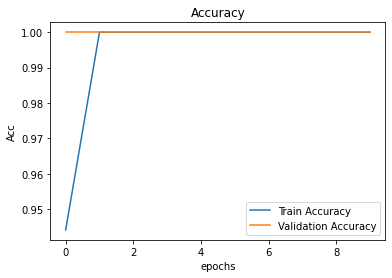

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

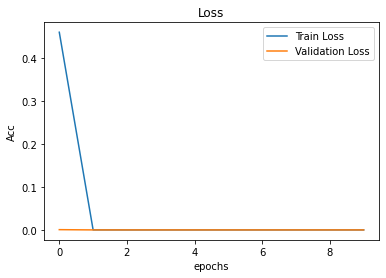

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# pred = model_lstm.predict(vectorized_validation_sentences)
import numpy as np
classes_x = (model_lstm.predict(vectorized_validation_sentences) > 0.5).astype("int32")
print(classification_report(y_test, classes_x))


14/14 [==============================] - 2s 40ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       435

    accuracy                           1.00       435
   macro avg       1.00      1.00      1.00       435
weighted avg       1.00      1.00      1.00       435

